In [1]:
import plotly.io as pio
#pio.renderers.default = "iframe"   # or "svg" or "png"

# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from collections import Counter
from textblob import TextBlob
import plotly.express as px

# Load dataset
df_meta = pd.read_json(
    "D:/School/SIM3032-O/WeekFour/archiveGameRecs/games_metadata.json",
    lines=True
)

# Load the games.csv
df_games = pd.read_csv(
    "D:/School/SIM3032-O/WeekFour/archiveGameRecs/games.csv"
)

# Merge both datasets
df = df_meta.merge(df_games, on="app_id", how="left")

df.head()

,app_id,description,tags,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre...",Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,,[Action],BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St...",Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P...",Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra...",Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [20]:
# Add sentiment polarity (−1 negative → +1 positive)
df['sentiment'] = df['description'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

# Add subjectivity (0 = objective → 1 = subjective)
df['subjectivity'] = df['description'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)

# TEXT DATA VISUALIZATION PROJECT
# Dataset: Steam Game Metadata

In [21]:
# Clean + tokenize + remove stopwords
text = " ".join(df['description'].dropna().astype(str)).lower()
words = text.split()

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
words = [
    w.strip(string.punctuation)
    for w in words
    if w.isalpha() and w not in ENGLISH_STOP_WORDS
]


In [22]:
filtered_words = [w for w in words if w.lower() != "game"]

# Visualization 1

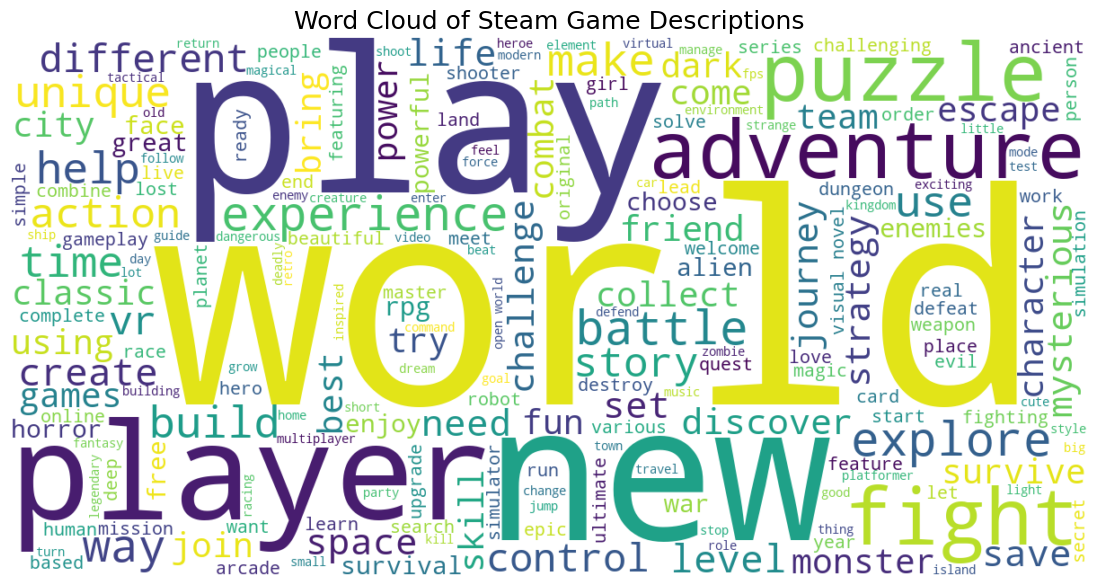

In [23]:
# ----------------------------------------
# WORD CLOUD
# ----------------------------------------
wordcloud = WordCloud(
    width=1200, 
    height=600, 
    background_color='white',
    colormap='viridis'
).generate(" ".join(filtered_words))

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Steam Game Descriptions", fontsize=18)
plt.show()

# Explanation
This word cloud visualizes the most common words appearing in the game description text. Larger words are those that appear more frequently across all descriptions.

# Interpretation
Words like “action,” “adventure,” “world,” and “multiplayer” appear prominently, suggesting the platform heavily features action-oriented and multiplayer experiences. The dominance of genre-related terms shows that descriptions focus on gameplay style and player experience.

# Visualization 2

C:\Users\leonh\AppData\Local\Temp\ipykernel_119048\2226394126.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




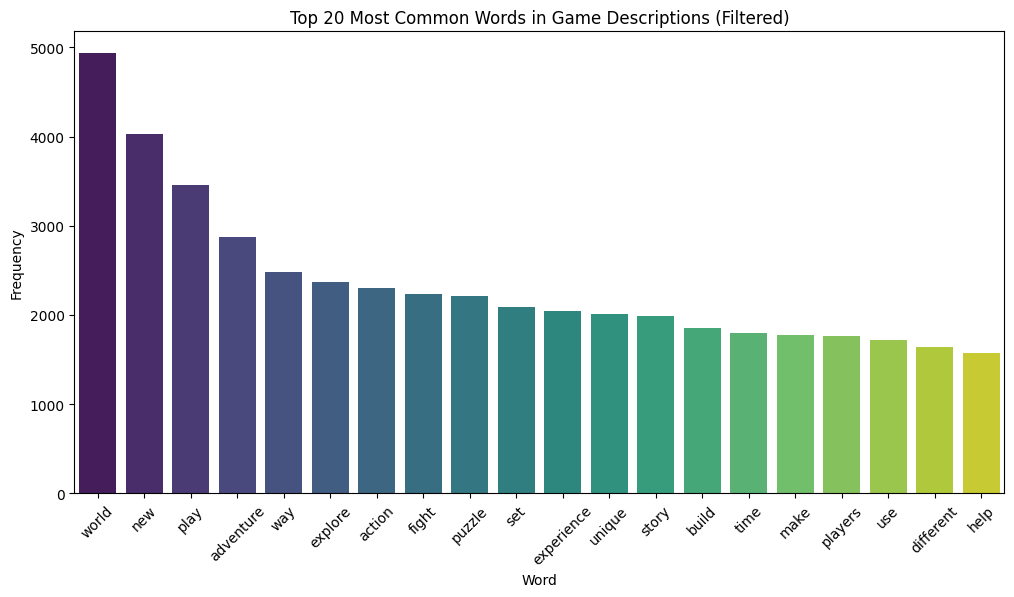

In [24]:
# Count word frequencies
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Create DataFrame
freq_df = pd.DataFrame(common_words, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=freq_df, x="Word", y="Frequency", palette="viridis")
plt.title("Top 20 Most Common Words in Game Descriptions (Filtered)")
plt.xticks(rotation=45)
plt.show()


# Explanation

This bar chart displays the 20 most frequent words in Steam game descriptions after removing stopwords, punctuation, and the common filler word “game.”

# Interpretation
Words like “world,” “new,” “adventure,” and “story” reflect the strong focus on exploration and narrative across many titles. Frequent combat- and multiplayer-related terms suggest that action-oriented and cooperative experiences are especially common in the Steam library.

# Visualization 3

In [40]:
# Use stable browser renderer
#pio.renderers.default = "iframe"

# Sample 500 rows
sample_df = df.sample(500, random_state=42).copy()

# Compute sentiment polarity
sample_df['sentiment'] = sample_df['description'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.polarity
)

# Compute subjectivity
sample_df['subjectivity'] = sample_df['description'].astype(str).apply(
    lambda x: TextBlob(x).sentiment.subjectivity
)

# Sentiment magnitude for bubble size
sample_df['abs_sentiment'] = sample_df['sentiment'].abs()

# Extract primary tag (first tag)
sample_df['primary_tag'] = sample_df['tags'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 else "Unknown"
)

# Create clean hover text
sample_df['hover_text'] = (
    "Game ID: " + sample_df['app_id'].astype(str) +
    "<br>Primary Tag: " + sample_df['primary_tag'].astype(str) +
    "<br>Sentiment: " + sample_df['sentiment'].round(3).astype(str) +
    "<br>Subjectivity: " + sample_df['subjectivity'].round(3).astype(str)
)

# Create the scatterplot
fig = px.scatter(
    sample_df,
    x="sentiment",
    y="subjectivity",
    size="abs_sentiment",
    color="primary_tag",           
    opacity=0.7,
    hover_name="app_id",
    hover_data={"hover_text": True},
    title="Sentiment vs Subjectivity of Steam Game Descriptions (500 Sample, Colored by Primary Tag)",
    size_max=12
)

# Use only our custom hover
fig.update_traces(
    hovertemplate="%{text}<extra></extra>",
    text=sample_df['hover_text']
)

fig.update_layout(height=650)
fig.show()

# Explanation
This chart maps Steam game descriptions by their sentiment and subjectivity, with colors showing primary genre tags. Bubble size reflects how strong the sentiment is. The visualization opens in a web browser to ensure full, reliable rendering outside JupyterLab.

# Interpretation
Steam descriptions are mostly neutral and moderately subjective, with genres clustering based on writing style. Action and RPG games use more emotional language, while Strategy titles stay more factual. Most games avoid extreme positive or negative sentiment.

# Steam Game Search Tool
Use this search tool to look up any Steam game by title.  
The tool displays full metadata including release date, price, ratings, tags, and sentiment analysis.


In [26]:
def display_game_info(row):
    print("============================================")
    print(f"🎮 Title: {row['title']}")
    print(f"🆔 Game ID: {row['app_id']}")
    print(f"📅 Release Date: {row['date_release']}")

    print(f"\n⭐ Rating: {row['rating']}")
    print(f"👍 Positive Ratio: {row['positive_ratio']}%")
    print(f"📝 User Reviews: {row['user_reviews']}")

    print(f"\n💲 Final Price: ${row['price_final']}")
    print(f"💸 Original Price: ${row['price_original']}")
    print(f"🏷 Discount: {row['discount']}%")

    print(f"\n🎮 Steam Deck Verified: {row['steam_deck']}")

    # Tags
    tags = row['tags']
    if isinstance(tags, list) and len(tags) > 0:
        print(f"\n🏷 Primary Tag: {tags[0]}")
        print(f"🏷 All Tags: {', '.join(tags)}")
    else:
        print("\n🏷 Tags: None")

    # Description
    print("\n📝 Description:")
    print(row['description'])

    # Sentiment (if calculated)
    if 'sentiment' in row:
        print(f"\n🙂 Sentiment: {round(row['sentiment'], 3)}")
        print(f"🧠 Subjectivity: {round(row['subjectivity'], 3)}")

    print("============================================\n")


In [27]:
def search_game_id(game_id):
    print("🔎 Searching by Game ID:", game_id, "\n")

    row = df[df['app_id'] == game_id]

    if row.empty:
        print(f"No game found with ID: {game_id}")
        return

    display_game_info(row.iloc[0])


In [28]:
def search_title(name):
    print("🔎 Searching by Title:", name)
    print("(Search is case-insensitive and supports partial matches)\n")

    matches = df[df['title'].str.contains(name, case=False, na=False)]

    if matches.empty:
        print(f"No game titles found matching: {name}")
        return
    
    for idx, row in matches.iterrows():
        display_game_info(row)


## 📝 Game Description and Sentiment Details
This section shows the full game description along with sentiment and subjectivity analysis generated from the text.


## 🔍 How to Search for a Game Title

You can search for any Steam game by entering part of its title.  
The search is **case-insensitive** and supports **partial matches**.

### ✔ Examples:
- `search_title("Final Fantasy")`
- `search_title("fantasy")`
- `search_game_id(13500)`


### ✔ Notes:
- Partial words are allowed  
- Spelling must be close (not fuzzy unless enabled)  
- Multiple results will be shown if more than one game matches  


In [36]:
search_title("Prince of Persia: The Two Thrones")

🔎 Searching by Title: Prince of Persia: The Two Thrones
(Search is case-insensitive and supports partial matches)

🎮 Title: Prince of Persia: The Two Thrones™
🆔 Game ID: 13530
📅 Release Date: 2008-11-21

⭐ Rating: Mostly Positive
👍 Positive Ratio: 78%
📝 User Reviews: 1397

💲 Final Price: $9.99
💸 Original Price: $9.99
🏷 Discount: 0.0%

🎮 Steam Deck Verified: True

🏷 Primary Tag: Action
🏷 All Tags: Action, Adventure, Platformer, Parkour, Third Person, Singleplayer, Hack and Slash, Fantasy, Time Manipulation, Time Travel, Story Rich, Stealth, Classic, Atmospheric, Great Soundtrack, 3D Platformer

📝 Description:
The Prince of Persia, a seasoned warrior, returns from the Island of Time to Babylon with his love, Kaileena. Instead of the peace that he longs for, he finds his homeland ravaged by war and the kingdom turned against him.

🙂 Sentiment: 0.375
🧠 Subjectivity: 0.425



In [39]:
search_game_id(545200)

🔎 Searching by Game ID: 545200 

🎮 Title: Super Blackjack Battle 2 Turbo Edition - The Card Warriors
🆔 Game ID: 545200
📅 Release Date: 2017-03-03

⭐ Rating: Mixed
👍 Positive Ratio: 60%
📝 User Reviews: 23

💲 Final Price: $11.99
💸 Original Price: $11.99
🏷 Discount: 0.0%

🎮 Steam Deck Verified: True

🏷 Primary Tag: Casual
🏷 All Tags: Casual, Sports, Card Game, Gambling

📝 Description:
Follow the invitation by the owner of the largest Casino in Las Vegas and Godfather of the local most influential crime family and face the other participants in a face-off game of cards. Only the best will fly to Vegas to challenge the Godfather himself in a final match!

🙂 Sentiment: 0.222
🧠 Subjectivity: 0.559

